In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Carregar os dados do arquivo CSV
data_path = '/Users/andreza/Downloads/DRYAD_FINAL/Phylogenetics/Phylogeography/Continuous/Sampling_in_Brazil.csv'
covid_data = pd.read_csv(data_path)
covid_data.head()

sequenceID  collectionDate  \
0  hCoV-19/Brazil/L10/CD150/2020|Brazil/RS/BentoG...     2020.199454   
1  hCoV-19/Brazil/AMBR-02/2020|EPI_ISL_417034|202...     2020.204918   
2  hCoV-19/Brazil/RJ-352/2020|EPI_ISL_427299|2020...     2020.174863   
3  hCoV-19/Brazil/L13/CD166/2020|Brazil/AM/Manaus...     2020.204918   
4  hCoV-19/Brazil/SPBR-02/2020|EPI_ISL_413016|202...     2020.158470   

               state    municipality  longitude   latitude  
0  Rio Grande do Sul  BentoGoncalves -51.596748 -29.168143  
1           Amazonas             NaN -60.342879  -2.212424  
2     Rio de Janeiro         Niteroi -43.061825 -22.887735  
3           Amazonas             NaN -60.193324  -2.096057  
4          São Paulo        SaoPaulo -46.650770 -23.960748

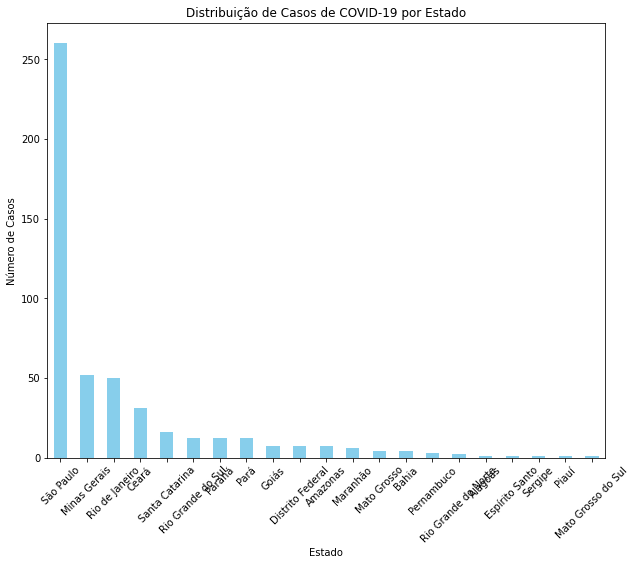

In [20]:
# Contar casos por estado
case_counts_by_state = covid_data['state'].value_counts()

# Gráfico de barras para casos por estado
plt.figure(figsize=(10, 8))
case_counts_by_state.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Casos de COVID-19 por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.show()


In [3]:
# Carregar os dados do arquivo completo
new_data_path = '/Users/andreza/Downloads/DRYAD_FINAL/Phylogenetics/Phylogeography/Continuous/MCC_tree_from_DTA.csv'
mcc_data = pd.read_csv(new_data_path)

mcc_data.head()

id date_onset        date  \
0  Algeria/G0638/2264/2020|EPI_ISL_418241||Algeri...        unk  02/03/2020   
1  Algeria/G0640/2265/2020|EPI_ISL_418242||Algeri...        unk  08/03/2020   
2  Argentina/C121/2020|EPI_ISL_420600||Argentina|...        unk  07/03/2020   
3  Argentina/C1374/2020|EPI_ISL_420599||Argentina...        unk  18/03/2020   
4  Argentina/C3013/2020|EPI_ISL_420598||Argentina...        unk  22/03/2020   

   year  month  day  epi_week__autocolor region__autocolor country__autocolor  \
0  2020      3    2                   10            Others            Algeria   
1  2020      3    8                   11            Others            Algeria   
2  2020      3    7                   10            Others          Argentina   
3  2020      3   18                   12            Others          Argentina   
4  2020      3   22                   13            Others          Argentina   

  State__autocolor  ...  Bases_covered_above10x  Bases_covered_above25x  \
0           Others  ...                     unk                     unk   
1           Others  ...                     unk                     unk   
2           Others  ...                     unk                     unk   
3           Others  ...                     unk                     unk   
4           Others  ...                     unk                     unk   

  Reference_covered_Perc Lineage__autocolour Bootstrap_Pangolin  \
0                    unk                 B.1                100   
1                    unk                 B.1                100   
2                    unk                 B.1                100   
3                    unk                 B.1                100   
4                    unk                 B.1                100   

  SH-aLRT_Pangolin Most_common_countries_Pangolin Number_taxa_Pangolin  \
0              100             UK, USA, Australia                 7440   
1              100             UK, USA, Australia                 7440   
2              100             UK, USA, Australia                 6733   
3              100             UK, USA, Australia                 6733   
4              100             UK, USA, Australia                 6733   

    Date_range_Pangolin Days_since_last_sampling_Pangolin  
0    January-24, May-21                                47  
1    January-24, May-21                                47  
2  January-24, April-23                                25  
3  January-24, April-23                                25  
4  January-24, April-23                                25  

[5 rows x 47 columns]

In [4]:
# Filtrar apenas os dados do Brazil
brazil_data = mcc_data[mcc_data['country__autocolor'].str.lower() == 'brazil']
# brazil_data.info()


In [5]:
brazil_data.head()
brazil_data['Municipality__autocolor']

264    RiodeJaneiro
265          Maceio
266          Manaus
267          Manaus
268          Manaus
           ...     
749        Brasilia
750        SaoPaulo
751        SaoPaulo
752        SaoPaulo
753        SaoPaulo
Name: Municipality__autocolor, Length: 490, dtype: object

In [6]:
# filtered_brazil = brazil_data['date','Municipality__autocolor','Travel_history__autocolor']

In [7]:
brazil_data['latitude']

264   -22.876652
265    -9.660822
266    -3.134691
267    -3.134691
268    -3.134691
         ...    
749   -15.794087
750   -23.567386
751   -23.567386
752   -23.567386
753   -23.567386
Name: latitude, Length: 490, dtype: float64

In [26]:
brazil_data['latitude_mun']

264    -22.87665212
265    -9.660822152
266    -3.134691491
267    -3.134691491
268    -3.134691491
           ...     
749    -15.79408736
750     -23.5673865
751     -23.5673865
752     -23.5673865
753     -23.5673865
Name: latitude_mun, Length: 490, dtype: object

/Users/andreza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


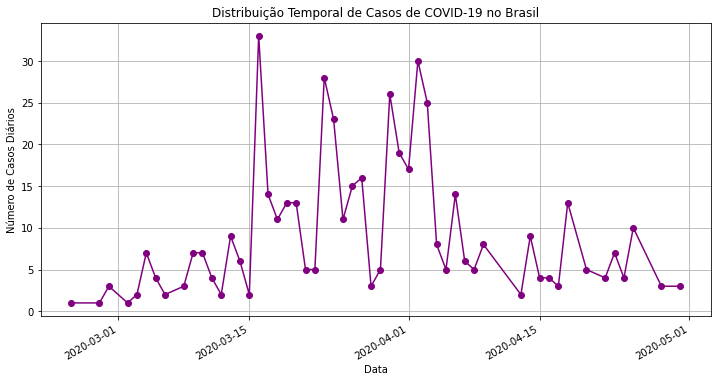

In [8]:
# Converter as datas de string para datetime
brazil_data['date'] = pd.to_datetime(brazil_data['date'], format='%d/%m/%Y')

# Agrupar os dados por data e contar os casos
cases_by_date = brazil_data.groupby('date').size()

# Criar um gráfico de linha para visualizar os casos ao longo do tempo
plt.figure(figsize=(12, 6))
cases_by_date.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Distribuição Temporal de Casos de COVID-19 no Brasil')
plt.xlabel('Data')
plt.ylabel('Número de Casos Diários')
plt.grid(True)
plt.show()


In [28]:
brazil_data.to_csv('/Users/andreza/Downloads/brazil_data.csv', index=False)

In [9]:
brazil_data.date.min()


Timestamp('2020-02-25 00:00:00')

In [10]:
brazil_data.date.max()


Timestamp('2020-04-30 00:00:00')

In [11]:
import folium

# Converter a coluna 'date' para datetime, se necessário
brazil_data['date'] = pd.to_datetime(brazil_data['date'], errors='coerce', format='%d/%m/%Y')

# Criar um mapa centrado no Brasil
brazil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicionar pontos para cada registro no dataframe
for idx, row in brazil_data.iterrows():
    # Usar as colunas 'latitude' e 'longitude' para as coordenadas
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            popup=f"Data: {row['date'].strftime('%Y-%m-%d')}\nEstado: {row['State__autocolor']}\nMunicípio: {row['Municipality__autocolor']}",
            color='red',
            fill=True,
            fill_color='red'
        ).add_to(brazil_map)

# Exibir o mapa
brazil_map


/Users/andreza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## analise usando Travel_history__autocolor
colocar o campo como origem do caso. O dado precisa de tratamento pois os valores aparecem conjugando nome de municipio, estado e pais

In [12]:
# Agrupar os dados por município e calcular a média das coordenadas
coordinates_mean = brazil_data.groupby('Municipality__autocolor')[['latitude', 'longitude']].mean()

# Converter o DataFrame agrupado em um dicionário
coordinates_dict = coordinates_mean.to_dict(orient='index')

# Criar um mapa centrado no Brasil
brazil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Iterar sobre cada linha dos dados
for idx, row in brazil_data.iterrows():
    # Obter coordenadas para origem (assumindo que a origem possa ser interpretada diretamente como município)
    origin_coords = coordinates_dict.get(row['Travel_history__autocolor'], {'latitude': None, 'longitude': None})
    destination_coords = coordinates_dict.get(row['Municipality__autocolor'], {'latitude': None, 'longitude': None})
    
    # Verificar se as coordenadas estão disponíveis
    if origin_coords['latitude'] is not None and destination_coords['latitude'] is not None:
        folium.CircleMarker(
            location=[origin_coords['latitude'], origin_coords['longitude']],
            radius=5,
            color='blue',
            popup=f"Origem: {row['Travel_history__autocolor']}",
            fill=True,
            fill_color='blue'
        ).add_to(brazil_map)
        
        folium.CircleMarker(
            location=[destination_coords['latitude'], destination_coords['longitude']],
            radius=5,
            color='red',
            popup=f"Destino: {row['Municipality__autocolor']}",
            fill=True,
            fill_color='red'
        ).add_to(brazil_map)
        
        # Linha entre origem e destino
        folium.PolyLine(locations=[
            [origin_coords['latitude'], origin_coords['longitude']],
            [destination_coords['latitude'], destination_coords['longitude']]
        ], color='green').add_to(brazil_map)

# Exibir o mapa
brazil_map


In [13]:
filtered_data = brazil_data[brazil_data['Travel_history__autocolor'] != 'unk']
filtered_data['Travel_history__autocolor']
# filtered_data.to_csv('/Users/andreza/Downloads//Filtered_MCC_Data.csv', index=False)

275              USA
276            Italy
278    PortugalSpain
279     RiodeJaneiro
280    PortugalSpain
           ...      
733               no
736               no
737               no
738               no
739               no
Name: Travel_history__autocolor, Length: 129, dtype: object

In [14]:
# # Carregar os dados
# data = filtered_data
# estados = pd.read_csv('/Users/andreza/Downloads/DRYAD_FINAL/Phylogenetics/Phylogeography/Continuous/All_Brazilian_states.csv')
# cities = set([])
# states = estados['state']  
# countries = set(["Brazil"])    

# # Função para limpar e padronizar os nomes
# def clean_location(name):
#     if pd.isna(name):
#         return name
#     original_name = name.strip()
#     cleaned_name = original_name.title()  # Padroniza a primeira letra de cada palavra para maiúscula

#     # Verificar se é cidade, estado ou país
#     if cleaned_name in cities:
#         return f"City: {cleaned_name}"
#     elif cleaned_name in states:
#         return f"State: {cleaned_name}"
#     elif cleaned_name in countries:
#         return f"Country: {cleaned_name}"
#     else:
#         return f"Unknown: {original_name}"  # Se não encontrado nas listas

# # Aplicar a função de limpeza
# data['Travel_history__autocolor'] = data['Travel_history__autocolor'].apply(clean_location)

# # Verificar os resultados
# print(data['Travel_history__autocolor'].head())

# # Salvar ou continuar processamento
# # data.to_csv('/mnt/data/Cleaned_MCC_Data.csv', index=False)


In [138]:

# Filtrar apenas casos entre datas especificas
start_date = "2020-03-01"
end_date = "2020-03-21"
# start_date = "2020-03-21"
# end_date = "2020-04-15"
mask = (brazil_data['date'] >= start_date) & (brazil_data['date'] <= end_date)
march_cases = brazil_data.loc[mask]

# Agrupar os dados por município e calcular a média das coordenadas
coordinates_mean = march_cases.groupby('Municipality__autocolor')[['latitude', 'longitude']].mean()

# Converter o DataFrame agrupado em um dicionário
coordinates_dict = coordinates_mean.to_dict(orient='index')

# Criar um mapa centrado no Brasil
brazil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Iterar sobre cada linha dos dados filtrados
for idx, row in march_cases.iterrows():
    origin_coords = coordinates_dict.get(row['Travel_history__autocolor'], {'latitude': None, 'longitude': None})
    destination_coords = coordinates_dict.get(row['Municipality__autocolor'], {'latitude': None, 'longitude': None})

    # Verificar se as coordenadas estão disponíveis
    if origin_coords['latitude'] is not None and destination_coords['latitude'] is not None:
        folium.CircleMarker(
            location=[origin_coords['latitude'], origin_coords['longitude']],
            radius=5,
            color='blue',
            popup=f"Origem: {row['Travel_history__autocolor']}",
            fill=True,
            fill_color='blue'
        ).add_to(brazil_map)

        folium.CircleMarker(
            location=[destination_coords['latitude'], destination_coords['longitude']],
            radius=5,
            color='red',
            popup=f"Destino: {row['Municipality__autocolor']}",
            fill=True,
            fill_color='red'
        ).add_to(brazil_map)

        # Linha entre origem e destino
        folium.PolyLine(locations=[
            [origin_coords['latitude'], origin_coords['longitude']],
            [destination_coords['latitude'], destination_coords['longitude']]
        ], color='grey').add_to(brazil_map)

# Exibir o mapa
brazil_map


In [28]:

# Filtrar apenas casos entre datas especificas
# start_date = "2020-03-01"
# end_date = "2020-03-21"
# start_date = "2020-03-21"
# end_date = "2020-04-15"
start_date = "2020-03-13"
end_date = "2020-04-01"
mask = (brazil_data['date'] >= start_date) & (brazil_data['date'] <= end_date)
march_cases = brazil_data.loc[mask]

# Agrupar os dados por município e calcular a média das coordenadas
coordinates_mean = march_cases.groupby('Municipality__autocolor')[['latitude', 'longitude']].mean()

# Converter o DataFrame agrupado em um dicionário
coordinates_dict = coordinates_mean.to_dict(orient='index')

# Criar um mapa centrado no Brasil
brazil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Iterar sobre cada linha dos dados filtrados
for idx, row in march_cases.iterrows():
    origin_coords = coordinates_dict.get(row['Travel_history__autocolor'], {'latitude': None, 'longitude': None})
    destination_coords = coordinates_dict.get(row['Municipality__autocolor'], {'latitude': None, 'longitude': None})

    # Verificar se as coordenadas estão disponíveis
    if origin_coords['latitude'] is not None and destination_coords['latitude'] is not None:
        folium.CircleMarker(
            location=[origin_coords['latitude'], origin_coords['longitude']],
            radius=5,
            color='blue',
            popup=f"Origem: {row['Travel_history__autocolor']}",
            fill=True,
            fill_color='blue'
        ).add_to(brazil_map)

        folium.CircleMarker(
            location=[destination_coords['latitude'], destination_coords['longitude']],
            radius=5,
            color='red',
            popup=f"Destino: {row['Municipality__autocolor']}",
            fill=True,
            fill_color='red'
        ).add_to(brazil_map)

        # Linha entre origem e destino
        folium.PolyLine(locations=[
            [origin_coords['latitude'], origin_coords['longitude']],
            [destination_coords['latitude'], destination_coords['longitude']]
        ], color='grey').add_to(brazil_map)

# Exibir o mapa
brazil_map


## analisando os dados de dispersão

In [1]:
import pandas as pd
# carregar arquivos
file_paths = {
    'among_states': '/Users/andreza/Downloads/DRYAD_FINAL/Phylogenetics/Phylogeography/Continuous/All_dispersal_statistics/All_among_states_transition_events.csv',
    'within_state': '/Users/andreza/Downloads/DRYAD_FINAL/Phylogenetics/Phylogeography/Continuous/All_dispersal_statistics/All_within_state_transition_events.csv',
    'within_vs_among': '/Users/andreza/Downloads/DRYAD_FINAL/Phylogenetics/Phylogeography/Continuous/All_dispersal_statistics/Within_vs_among_states_transitions.csv'
}

data_among_states = pd.read_csv(file_paths['among_states'])
data_within_state = pd.read_csv(file_paths['within_state'])
data_within_vs_among = pd.read_csv(file_paths['within_vs_among'])


In [7]:
import datetime
# Definir a função para converter o ano decimal em datetime
def convert_decimal_year_to_datetime(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    start_of_year = datetime.datetime(year, 1, 1)
    days_in_year = (datetime.datetime(year + 1, 1, 1) - start_of_year).days
    days = int(days_in_year * remainder)
    full_date = start_of_year + datetime.timedelta(days=days)
    return full_date

In [3]:
clade_i_jumps = pd.read_csv('/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/data/Phylogeography/clade_i_jumps.csv')

In [11]:
clade_ii_jumps = pd.read_csv('/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/data/Phylogeography/clade_ii_jumps.csv')

In [4]:
clade_i_jumps.head()

treeId  startLocation    endLocation         time
0  60002000  SC-notcapital         Maceio  2020.189464
1  60002000       SaoPaulo  SC-notcapital  2020.162015
2  60002000  PR-notcapital  MG-notcapital  2020.202410
3  60002000       SaoPaulo  PR-notcapital  2020.164795
4  60002000       SaoPaulo  SP-notcapital  2020.237703

In [8]:
clade_i_jumps['time'] = clade_i_jumps['time'].apply(convert_decimal_year_to_datetime)


In [12]:
clade_ii_jumps['time'] = clade_ii_jumps['time'].apply(convert_decimal_year_to_datetime)


In [16]:
clade_ii_jumps.head()

treeId  startLocation    endLocation       time
0  60002000  SP-notcapital         Europe 2020-02-22
1  60002000       SaoPaulo         Manaus 2020-03-20
2  60002000       SaoPaulo         Manaus 2020-03-13
3  60002000  SP-notcapital       SaoPaulo 2020-03-12
4  60002000  SP-notcapital  BeloHorizonte 2020-03-07

In [9]:
clade_i_jumps.to_csv('/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/data/Phylogeography/clade_i_jumps-date.csv', index=False)

In [15]:
clade_ii_jumps.to_csv('/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/data/Phylogeography/clade_ii_jumps-date.csv', index=False)

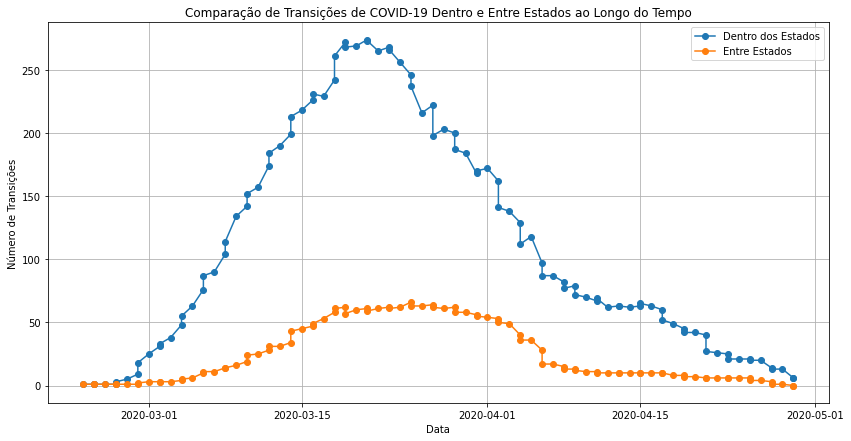

In [5]:
## MESMA FIGURA DO ARTIGO

# aplicar a função de conversão. definir corretamente a biblioteca datetime
data_within_vs_among['time'] = data_within_vs_among['time'].apply(convert_decimal_year_to_datetime)

# Criar o gráfico comparativo das transições dentro e entre estados ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(data_within_vs_among['time'], data_within_vs_among['within_state_transitions'], label='Dentro dos Estados', marker='o', linestyle='-')
plt.plot(data_within_vs_among['time'], data_within_vs_among['among_state_transitions'], label='Entre Estados', marker='o', linestyle='-')
plt.title('Comparação de Transições de COVID-19 Dentro e Entre Estados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Transições')
plt.legend()
plt.grid(True)
plt.show()


## analise plotando os caminhos do FF sobre os casos de covid

In [23]:
caminhos = pd.read_csv('/Users/andreza/Downloads/union_paths.csv')

In [24]:
# Passo 1: Calcular as médias de coordenadas em brazil_data
coordinates = brazil_data.groupby('Municipality__autocolor').agg({'latitude': 'mean', 'longitude': 'mean'}).reset_index()

# Criar um dicionário de coordenadas
coordinates_dict = coordinates.set_index('Municipality__autocolor').to_dict(orient='index')

# Passo 2: Agrupar caminhos por pares de origem e destino e contar ocorrências
grouped_caminhos = caminhos.groupby(['ori_muni_name', 'des_muni_name']).size().reset_index(name='count')

# Passo 3: Adicionar coordenadas de origem e destino ao DataFrame agrupado
grouped_caminhos['ori_latitude'] = grouped_caminhos['ori_muni_name'].map(lambda x: coordinates_dict.get(x, {}).get('latitude'))
grouped_caminhos['ori_longitude'] = grouped_caminhos['ori_muni_name'].map(lambda x: coordinates_dict.get(x, {}).get('longitude'))
grouped_caminhos['des_latitude'] = grouped_caminhos['des_muni_name'].map(lambda x: coordinates_dict.get(x, {}).get('latitude'))
grouped_caminhos['des_longitude'] = grouped_caminhos['des_muni_name'].map(lambda x: coordinates_dict.get(x, {}).get('longitude'))

# Remover quaisquer linhas onde as coordenadas não estão disponíveis
final_caminhos = grouped_caminhos.dropna(subset=['ori_latitude', 'ori_longitude', 'des_latitude', 'des_longitude'])

# O DataFrame final_caminhos está agora pronto para ser usado na plotagem do mapa
final_caminhos.to_csv('/Users/andreza/Downloads/final_caminhos.csv', index=False)


In [25]:
# garantir que coluna 'date' está no formato datetime
brazil_data['date'] = pd.to_datetime(brazil_data['date'])

# Filtrando os dados para o intervalo de datas especificado
# start_date = "2020-03-01"
# end_date = "2020-03-21"
# start_date = "2020-03-21"
# end_date = "2020-04-15"
start_date = "2020-03-13"
end_date = "2020-04-01"
filtered_brazil_data = brazil_data[(brazil_data['date'] >= start_date) & (brazil_data['date'] <= end_date)]

# Agrupando os dados filtrados por município e calculando a média das coordenadas e o número total de casos
case_counts = filtered_brazil_data.groupby('Municipality__autocolor').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'Municipality__autocolor': 'size'
}).rename(columns={'Municipality__autocolor': 'case_count'}).reset_index()

# Criando um conjunto de municípios com casos
municipios_com_casos = set(case_counts['Municipality__autocolor'])


/Users/andreza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# Filtrando final_caminhos para incluir apenas rotas entre municípios com casos confirmados
filtered_final_caminhos = final_caminhos[
    (final_caminhos['ori_muni_name'].isin(municipios_com_casos)) &
    (final_caminhos['des_muni_name'].isin(municipios_com_casos))
]

In [27]:
# Criando um mapa centrado no Brasil
brazil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicionando marcadores para cada município usando os dados de case_counts
for idx, row in case_counts.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5 + row['case_count']/10,  # Ajuste o tamanho baseado na contagem de casos
        color='red',
        fill=True,
        fill_color='red',
        popup=f"Município: {row['Municipality__autocolor']}, Casos: {row['case_count']}"
    ).add_to(brazil_map)

# Adicionando linhas entre origem e destino de filtered_final_caminhos
for idx, row in filtered_final_caminhos.iterrows():
    folium.PolyLine(
        locations=[
            [row['ori_latitude'], row['ori_longitude']],
            [row['des_latitude'], row['des_longitude']]
        ],
        color='grey',
        weight=1,
        tooltip=f"{row['ori_muni_name']} to {row['des_muni_name']} ({row['count']} times)"
    ).add_to(brazil_map)

  
    
# Exibindo o mapa
brazil_map


## Analise phylogeography

In [2]:
import pandas as pd

In [3]:
clade_i_jumps = pd.read_csv('/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/data/Phylogeography/clade_i_jumps-date.csv')

In [4]:
clade_ii_jumps = pd.read_csv('/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/data/Phylogeography/clade_ii_jumps-date.csv')

In [5]:
BFs_b1_clade_i = pd.read_csv('/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/data/Phylogeography/BFs_b1_clade_i.csv')

In [6]:
BFs_b1_clade_ii = pd.read_csv('/Users/andreza/reproducibility_transportation_hubs-early_warning_surveillance_systems/data/Phylogeography/BFs_b1_clade_ii.csv')